In [2]:
# 训练误差和泛化误差
# 训练误差：在训练数据上的误差
# 泛化误差：在新数据上的误差

# 验证数据集：一个用来评估模型好坏的数据集
# 测试数据集：只用一次的数据集

# K-折交叉验证(数据不足)
# 李宏毅
# 把训练模型分割成K块
# For i=1,..,k
# --使用第i块作为验证数据集，其余作为训练数据集
# 报告验证集误差的平均
# K=5或10

# 过拟合与欠拟合
# 模型容量
# --模拟各种函数的能力
# 过拟合不是坏事，首先是模型够复杂才有前途，再控制误差
# 估计模型容量(难以在不同种类算法中比较)
# --参数的个数
# --参数值的选择范围
# VC维--完美分类的最大数据集
# 林轩田 VC 维

# 数据复杂度
# 样本个数，每个样本元素个数
# 时间空间结构
# 多样性

In [3]:
import math
import numpy as np
import torch
from torch import nn 
from d2l import torch as d2l 

In [12]:
max_degree=20
n_train,n_test=100,100
true_w=np.zeros(max_degree)
true_w[0:4]=np.array([5,1.2,-3.4,5.6])

features=np.random.normal(size=(n_train+n_test,1))
np.random.shuffle(features)
ploy_features=np.power(features,np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    ploy_features[:,i]/=math.gamma(i+1)
labels=np.dot(ploy_features,true_w)
labels+=np.random.normal(scale=0.1,size=labels.shape)

In [13]:
features[:2],ploy_features[:2,:],labels[:2]

(array([[-0.16382626],
        [ 1.30393379]]),
 array([[ 1.00000000e+00, -1.63826263e-01,  1.34195222e-02,
         -7.32823392e-04,  3.00139294e-05, -9.83413978e-07,
          2.68515062e-08, -6.28425987e-10,  1.28690851e-11,
         -2.34254903e-13,  3.83771053e-15, -5.71561613e-17,
          7.80306692e-19, -9.83344071e-21,  1.15069703e-22,
         -1.25676263e-24,  1.28681703e-26, -1.24008485e-28,
          1.12865815e-30, -9.73178144e-33],
        [ 1.00000000e+00,  1.30393379e+00,  8.50121658e-01,
          3.69500784e-01,  1.20451139e-01,  3.14120619e-02,
          6.82654147e-03,  1.27162258e-03,  2.07263955e-04,
          3.00287193e-05,  3.91554616e-06,  4.64146630e-07,
          5.04347060e-08,  5.05873209e-09,  4.71160834e-10,
          4.09575020e-11,  3.33786691e-12,  2.56021026e-13,
          1.85463592e-14,  1.27280128e-15]]),
 array([4.59116265, 5.86787669]))

In [15]:
true_w,features,ploy_features,labels=[
    torch.tensor(x,dtype=torch.float32)
    for x in [true_w,features,ploy_features,labels]
]

In [17]:
def evaluate_loss(net,data_iter,loss):
    """评定给定数据集上的损失"""
    metric=d2l.Accumulator(2)
    for X,y in data_iter:
        out=net(X)
        y=y.reshape(out.shape)
        l=loss(out,y)
        metric.add(l.sum(),l.numel())
    return metric[0]/metric[1]

In [18]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())


weight: [[2.8545952 4.1398954]]


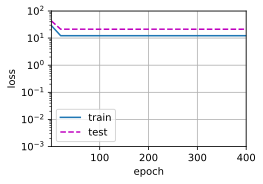

In [25]:
# 数据不全 可视为欠拟合
size=2

train(ploy_features[:n_train, :size], ploy_features[n_train:, :size],
      labels[:n_train], labels[n_train:])


weight: [[ 4.9930277  1.203425  -3.3937366  5.6073294]]


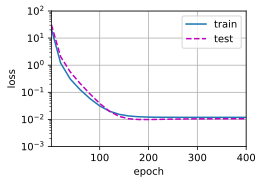

In [26]:
# 正确解
size = 4

train(ploy_features[:n_train, :size], ploy_features[n_train:, :size],
      labels[:n_train], labels[n_train:])


weight: [[ 4.9053      1.3198599  -3.0735435   5.07373    -0.6396976   1.3036726
  -0.12372263  0.07008758 -0.01950991 -0.01178762 -0.12956643  0.11424386
   0.05687844  0.08622882  0.02852293 -0.19941606  0.21902049 -0.22189495
  -0.20209865 -0.20117582]]


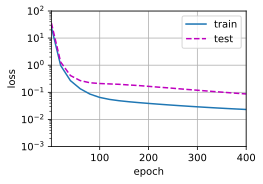

In [29]:
# 数据无效维数增大 噪音增大 过拟合
train(ploy_features[:n_train, :], ploy_features[n_train:, :],
      labels[:n_train], labels[n_train:])


In [30]:
# 神经网络是一种语言
# 可编程性高 描述世界的方面
# SVM -> 抽取特征+数据SVM分类
# 神经网络 -> end to end
# HPO(超参数优化) autodl
# 超参数的设计 靠经验
# 随机好一点 在参数空间
# CNN 是对 MLP 的限制
# MLP 只是理论上能训练 实际上训练不出来
# CNN 和 RNN 是辅助训练的
# 艺术 工程 科学
# 想象 验证 理解
# 统计 优化
# 数据集没采样好 & 实际数据集就是偏差的